<a href="https://colab.research.google.com/github/salonii1030/E-Commerce-Customer-Segmentation-Project/blob/main/E_Comm_Cust_Seg_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [164]:
import pandas as pd
import matplotlib.pyplot as plt


In [165]:
# df = pd.read_csv("/content/data.csv")
df = pd.read_csv("/content/data.csv", encoding= 'unicode_escape')

In [166]:
df = df.drop(['InvoiceNo','StockCode'],axis = 1)

In [167]:
df

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [168]:
df.isnull().sum()

Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [169]:
(df.Description.isnull().sum()*100)/df.shape[0]

0.2683107311375157

In [170]:
df = df.dropna(subset = ['Description'])

In [171]:
(df.CustomerID.isnull().sum()*100)/df.shape[0]

24.724722687365276

In [172]:
df.CustomerID.value_counts()

17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
           ... 
15070.0       1
15753.0       1
17065.0       1
16881.0       1
16995.0       1
Name: CustomerID, Length: 4372, dtype: int64

In [173]:
df = df.dropna(subset = ['CustomerID'])

In [174]:
df.CustomerID.isnull().sum()

0

In [175]:
df.dtypes

Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [176]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [177]:
df['Description_processed'] = df['Description'].str.replace("[^a-zA-Z0-9]", " ")


In [178]:
df['Description_processed'] = df['Description_processed'].apply(lambda row: ' '.join([word for word in row.split() if len(word)>2]))

In [179]:
df['Description_processed'] = [descpt.lower() for descpt in df['Description_processed']]

Stop words removal

In [180]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')
add_words = ['felt','spot','colour']
stop_words.extend(add_words)

def remove_stopwords(des):
    description_tokenized = word_tokenize(des)
    des_new = " ".join([i for i in description_tokenized if i not in stop_words])
    return des_new

df['Description_processed'] = [remove_stopwords(r) for r in df['Description_processed']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Lemmatization

In [181]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [182]:
lemmatizer = WordNetLemmatizer()
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:        
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

df['Description_processed'] = df['Description_processed'].apply(lambda x: lemmatize_sentence(x))

In [187]:
df['Description_processed']

0            white hang heart light holder
1                      white metal lantern
2            cream cupid heart coat hanger
3         knit union flag hot water bottle
4            red woolly hottie white heart
                        ...               
541904                pack spaceboy napkin
541905              child apron dolly girl
541906        childrens cutlery dolly girl
541907     childrens cutlery circus parade
541908            bake set piece retrospot
Name: Description_processed, Length: 406829, dtype: object

In [188]:
df1 = df['Description_processed'].drop_duplicates()

In [190]:
df1 = pd.DataFrame(df1)

In [191]:
df1

,Description_processed
0,white hang heart light holder
1,white metal lantern
2,cream cupid heart coat hanger
3,knit union flag hot water bottle
4,red woolly hottie white heart
...,...
503602,set ribbon perfectly pretty
504104,set ribbon party
530382,pink crystal skull phone charm
537621,cream hang heart light holder


Plotting most freqent words

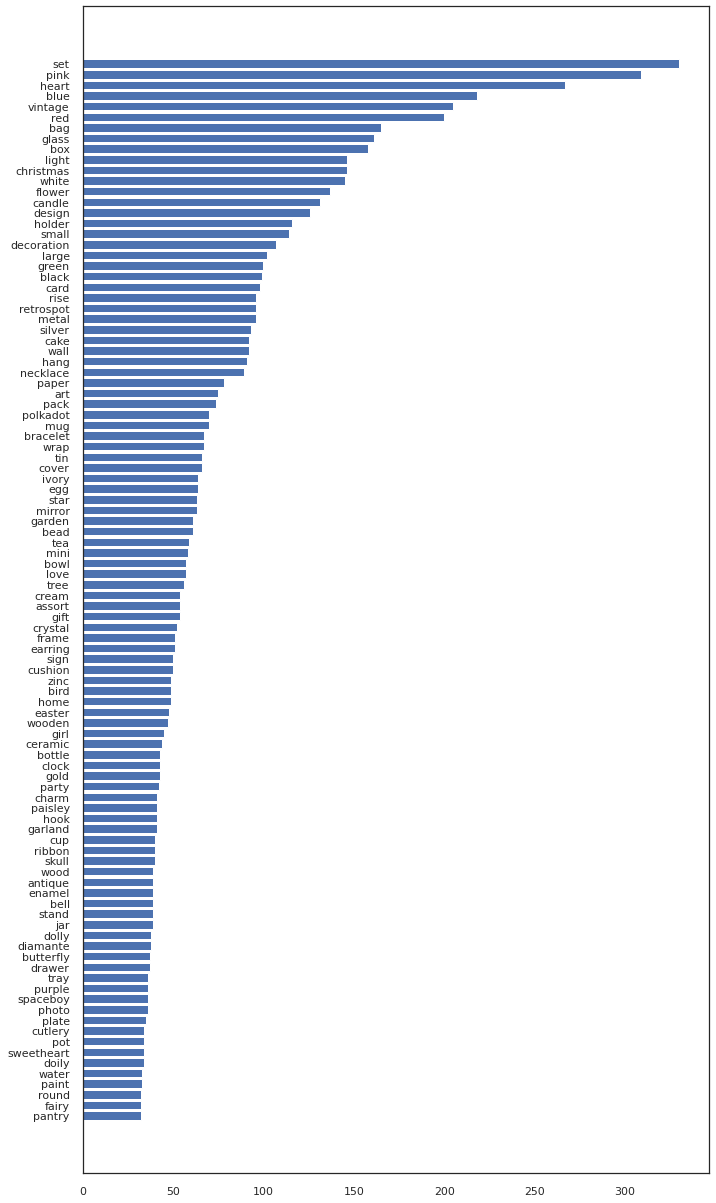

In [192]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist

all_words = ' '.join([text for text in df1['Description_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df

# Subsets top 100 words by frequency
words_df = words_df.nlargest(columns="count", n = 100) 
words_df.sort_values('count', inplace = True)

# Plotting 100 frequent words
plt.figure(figsize=(10,20))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

Word Cloud

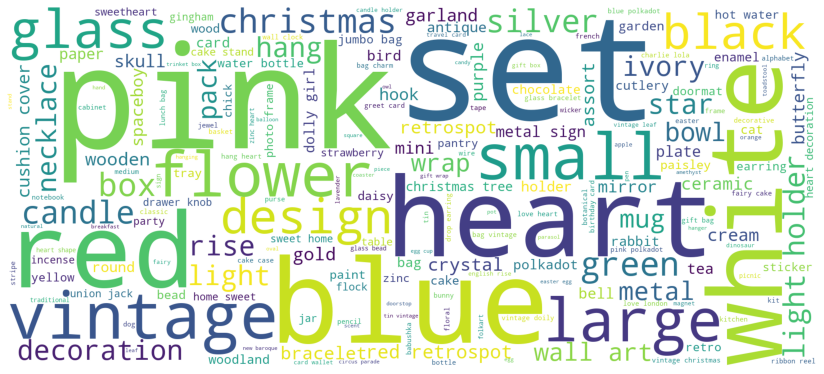

In [193]:
from wordcloud import WordCloud

all_words = ' '.join([text for text in df1['Description_processed']])
 
wordcloud = WordCloud(width = 1800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (13,5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()
     

Bag of words model

In [194]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf = TfidfVectorizer()
# X = tfidf.fit_transform(df1['Description_processed'])
# featureNames = tfidf.get_feature_names()
# df2 = pd.DataFrame(X.toarray(), columns = featureNames)

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Step 1: Design the Vocabulary
count_vectorizer = CountVectorizer(binary = True) 

# Step 2: Create the Bag-of-Words Model
bag_of_words = count_vectorizer.fit_transform(df1['Description_processed']) 

# Bag-of-Words Model as a pandas DataFrame
feature_names = count_vectorizer.get_feature_names()
df_binary = pd.DataFrame(bag_of_words.toarray(), columns = feature_names)


In [195]:
df_binary

,120cm,125g,15c,15cm,16x16cm,17080,18pc,200,20light,250g,...,world,woven,wrap,wreath,wreck,write,xmas,yellow,yuletide,zinc
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3764,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [196]:
X1 = bag_of_words.toarray()

In [197]:
X1

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [198]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_context('notebook')
plt.style.use('fivethirtyeight')

from warnings import filterwarnings
filterwarnings('ignore')

k-means model

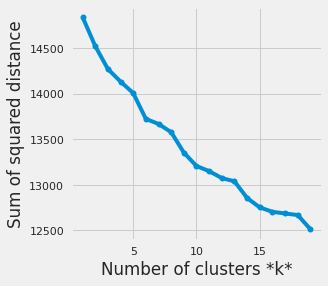

In [199]:
from sklearn.cluster import KMeans

list_k = list(range(1, 20))
inertias = []
for k in list_k:
    km = KMeans(n_clusters = k)
    km.fit(X1)
    inertias.append(km.inertia_)

# Plotting
plt.figure(figsize=(4, 4))
plt.plot(list_k, inertias, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance'); 

PCA

In [200]:
from sklearn.decomposition import PCA
# finding the optimum number of components:
components = None
pca = PCA(n_components = components)  # components - hyperparameter
pca.fit(X1)

PCA()

In [201]:
# printing the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)

Variances (Percentage):
[2.24205401e+00 1.95397686e+00 1.88445757e+00 ... 8.83391316e-34
 7.62727184e-34 6.36777249e-34]


In [202]:
# printing the cumulative variances
print("Cumulative Variances (Percentage):")
print((pca.explained_variance_ratio_.cumsum() * 100))

Cumulative Variances (Percentage):
[  2.24205401   4.19603087   6.08048843 ... 100.         100.
 100.        ]


Text(0, 0.5, 'Explained variance (%)')

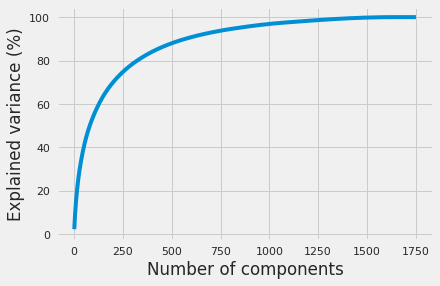

In [203]:
# plot a scree plot
import numpy as np
components = len(pca.explained_variance_ratio_) \
    if components is None else components
plt.plot(range(1,components+1), 
         np.cumsum(pca.explained_variance_ratio_ * 100))

plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

**from above graph, it takes 1250 components to reach around 100% variance. So, 85% variance is sufficient for modelling.**

Number of components: 422


Text(0, 0.5, 'Explained variance (%)')

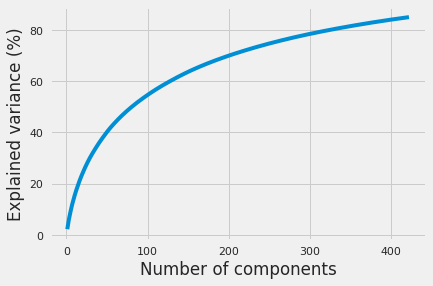

In [204]:
# choosing only 85% of variations:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.85)
pca.fit(X1)

# optimum no:of components
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')

# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

**From above plot, We can see that optimal components are 422 for the variation of 85%**

**PCA**

In [205]:
from sklearn.decomposition import PCA

pca = PCA(422)
PCA_data = pca.fit_transform(X1)
PCA_data.shape 

(3766, 422)

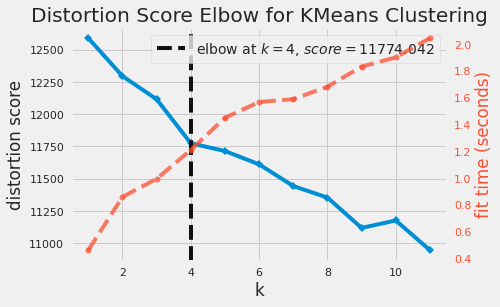

In [206]:
# Elbow plot
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,12)).fit(PCA_data)
visualizer.show()

**From the above Elbow plot, Optimal K- value occurs at k = 4 i.e. 4 Clusters are required **

In [207]:
km = KMeans(n_clusters=4,init="k-means++",random_state=42) # applying k = 4
km.fit(PCA_data)                 # fit the data

centroids = km.cluster_centers_  # centroid points
print("centroids: \n",centroids)

print("\ninertia: ",km.inertia_)  # measures how tight my groups are
     

centroids: 
 [[-2.25445125e-01 -9.71025043e-02  7.81194487e-01 ...  1.62827839e-03
   5.83187930e-04  9.81439694e-05]
 [ 8.45015880e-01  3.55038581e-01  1.60104853e-01 ... -4.01498281e-05
   6.97069552e-05 -2.83519154e-06]
 [-2.64842002e-02 -1.14017103e-01 -8.16237304e-02 ... -1.45785936e-04
  -6.64276210e-05  4.00901376e-05]
 [-4.64079736e-01  7.94714640e-01 -1.26862346e-01 ... -8.65806406e-05
   1.28405855e-05 -4.73852893e-04]]

inertia:  11774.041526790832


In [208]:
km.labels_   # shows which group each datapoint belongs to

array([0, 2, 0, ..., 3, 0, 2], dtype=int32)

In [209]:
#predict the labels of clusters
label = km.fit_predict(PCA_data)  
print(label)

[0 2 0 ... 3 0 2]


**Visualizing the Clusters**

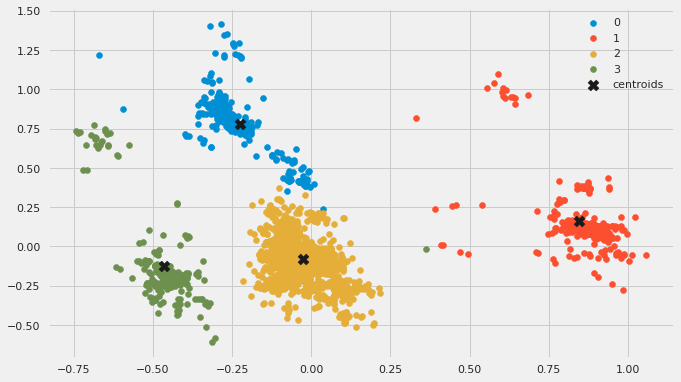

In [210]:
centroids = km.cluster_centers_   # Getting the Centroids
u_labels = np.unique(label)      # Getting the labels
 
# plotting the results:
plt.figure(figsize=(10, 6)) 
for i in u_labels:
    plt.scatter(PCA_data[label == i , 0] , PCA_data[label == i , 2] , label = i)
plt.scatter(centroids[:,0] , centroids[:,2] , marker="X", c="k", s=120, label="centroids")
plt.legend()
plt.show()

**3D Plot** 

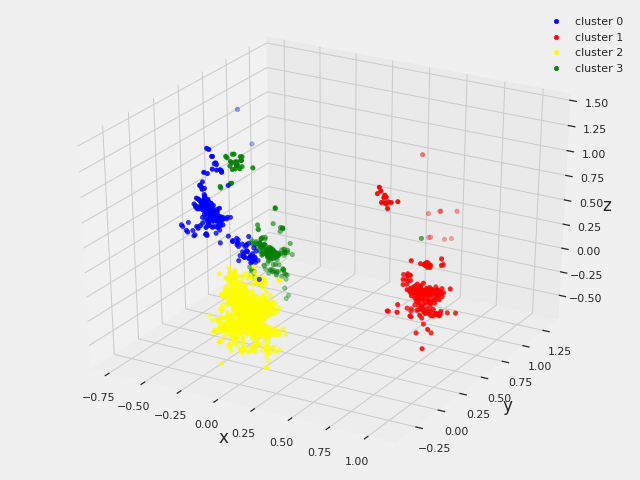

In [211]:
labels = np.unique(label)  # Getting the labels

fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(PCA_data[label == 0,0],PCA_data[label == 0,1],PCA_data[label == 0,2], s = 20 , color = 'blue', label = "cluster 0")  
ax.scatter(PCA_data[label == 1,0],PCA_data[label == 1,1],PCA_data[label == 1,2], s = 20 , color = 'red', label = "cluster 1")  
ax.scatter(PCA_data[label == 2,0],PCA_data[label == 2,1],PCA_data[label == 2,2], s = 20 , color = 'yellow', label = "cluster 2")  
ax.scatter(PCA_data[label == 3,0],PCA_data[label == 3,1],PCA_data[label == 3,2], s = 20 , color = 'green', label = "cluster 3") 

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.legend()
plt.show()

In [212]:
# creating a dataframe for the cluster labels:
df_cluster = pd.DataFrame(km.labels_)
print(df_cluster.shape)
df_cluster

(3766, 1)


,0
0,0
1,2
2,0
3,2
4,0
...,...
3761,1
3762,1
3763,3
3764,0


In [213]:
print(df1.shape)
df1

(3766, 1)


,Description_processed
0,white hang heart light holder
1,white metal lantern
2,cream cupid heart coat hanger
3,knit union flag hot water bottle
4,red woolly hottie white heart
...,...
503602,set ribbon perfectly pretty
504104,set ribbon party
530382,pink crystal skull phone charm
537621,cream hang heart light holder


**From above two Data Frames, Shape is same for df1 and df_cluster but index are different so, need to make index same to merge two DF's**

In [214]:
df1 = df1.reset_index(drop=True)

df2 = df1.join(df_cluster)

df2.rename(columns={0:'Product Cluster'},inplace=True)

In [215]:
# merging the "product clusters" with the original dataframe:
df3 = pd.merge(df, df2, how='left', on = 'Description_processed')
df3

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_processed,Product Cluster
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,white hang heart light holder,0
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,white metal lantern,2
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,cream cupid heart coat hanger,0
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,knit union flag hot water bottle,2
4,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,red woolly hottie white heart,0
...,...,...,...,...,...,...,...,...
406824,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,pack spaceboy napkin,2
406825,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,child apron dolly girl,2
406826,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,childrens cutlery dolly girl,2
406827,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,childrens cutlery circus parade,2


**One-hot Encoding " Product Cluster "**

In [216]:
df4 = pd.get_dummies(df3,columns=["Product Cluster"])
df4.head(3)

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_processed,Product Cluster_0,Product Cluster_1,Product Cluster_2,Product Cluster_3
0,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,white hang heart light holder,1,0,0,0
1,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,white metal lantern,0,0,1,0
2,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,cream cupid heart coat hanger,1,0,0,0


In [217]:
# copying the dataframe into another variable:
df5 = df4.copy()

In [218]:
# Dropping unnecessary features:
df5 = df5.drop(["Description","InvoiceDate","Description_processed"],axis=1)
df5.head(5)

,Quantity,UnitPrice,CustomerID,Country,Product Cluster_0,Product Cluster_1,Product Cluster_2,Product Cluster_3
0,6,2.55,17850.0,United Kingdom,1,0,0,0
1,6,3.39,17850.0,United Kingdom,0,0,1,0
2,8,2.75,17850.0,United Kingdom,1,0,0,0
3,6,3.39,17850.0,United Kingdom,0,0,1,0
4,6,3.39,17850.0,United Kingdom,1,0,0,0


**One-hot Encoding "Country" Feature**

In [219]:
df6 = pd.get_dummies(df5,columns=["Country"])
df6.head(5)

,Quantity,UnitPrice,CustomerID,Product Cluster_0,Product Cluster_1,Product Cluster_2,Product Cluster_3,Country_Australia,Country_Austria,Country_Bahrain,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,6,2.55,17850.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,6,3.39,17850.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8,2.75,17850.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6,3.39,17850.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6,3.39,17850.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


**Label Encoding "CustomerID" Feature**

In [220]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder() # label_encoder object knows how to understand word labels.
 
df6['CustomerID']= label_encoder.fit_transform(df6['CustomerID'])
df6.head(5)

,Quantity,UnitPrice,CustomerID,Product Cluster_0,Product Cluster_1,Product Cluster_2,Product Cluster_3,Country_Australia,Country_Austria,Country_Bahrain,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,6,2.55,4048,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,6,3.39,4048,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8,2.75,4048,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6,3.39,4048,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6,3.39,4048,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [221]:
df6.shape

(406829, 44)

**Grouping the Costomers based on CustomerID**

In [222]:
df7 = df6.groupby(['CustomerID']).mean()
df7

,Quantity,UnitPrice,Product Cluster_0,Product Cluster_1,Product Cluster_2,Product Cluster_3,Country_Australia,Country_Austria,Country_Bahrain,Country_Belgium,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
CustomerID,,,,,,,,,,,,,,,,,,,,,
0,0.000000,1.040000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,13.505495,2.644011,0.060440,0.153846,0.714286,0.071429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,75.516129,5.764839,0.064516,0.096774,0.774194,0.064516,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8.643836,8.289041,0.095890,0.232877,0.643836,0.027397,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11.588235,3.841176,0.000000,0.000000,0.941176,0.058824,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,4.500000,4.765000,0.000000,0.100000,0.900000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4368,7.714286,5.622857,0.000000,0.285714,0.714286,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4369,7.538462,4.821538,0.000000,0.076923,0.846154,0.076923,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [224]:
df7.describe()

,Quantity,UnitPrice,Product Cluster_0,Product Cluster_1,Product Cluster_2,Product Cluster_3,Country_Australia,Country_Austria,Country_Bahrain,Country_Belgium,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
count,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,...,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000,4372.000000
mean,22.389288,7.978608,0.094375,0.114428,0.745676,0.045521,0.001902,0.002119,0.000457,0.005464,...,0.000229,0.000229,0.000229,0.006782,0.001830,0.004670,0.000915,0.000457,0.903477,0.000915
std,213.257466,144.963315,0.119926,0.106713,0.146742,0.061189,0.042445,0.045451,0.021386,0.073021,...,0.015124,0.015124,0.015124,0.081589,0.042742,0.067696,0.030237,0.021386,0.295341,0.030237
min,-144.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.475745,2.221431,0.000000,0.040000,0.672679,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,9.494392,2.944581,0.060000,0.100000,0.750000,0.031008,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,14.008333,3.897209,0.132561,0.162791,0.832015,0.066667,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,12540.000000,8055.780000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [225]:
y = df7.to_numpy()

**Scaling**

In [226]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = MinMaxScaler()
y_scaled = sc.fit_transform(y)

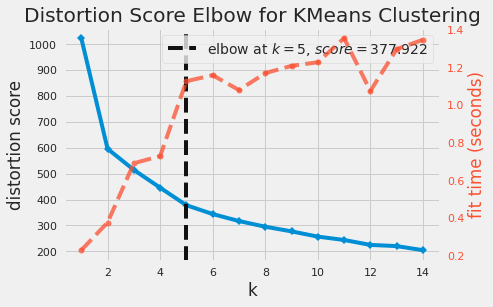

In [227]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=9)
visualizer = KElbowVisualizer(model, k=(1,15)).fit(y_scaled)
visualizer.show()

**The optimal value of k occurs at k = 5**

**K-Means Clustering :**

In [228]:
km = KMeans(n_clusters = 5, init= "k-means++", random_state = 10)     # applying k = 4
km.fit(y_scaled)          # fit the data - identify pattern, does everything

centroids = km.cluster_centers_   # final centroid points

# print("centroids: ",centroids)
print("inertia: ",km.inertia_)    # measures how tight my groups are. Lower the better

inertia:  377.9217759044408


In [229]:
km.labels_ 

array([0, 4, 4, ..., 0, 0, 3], dtype=int32)

In [230]:
# predict the labels of clusters
label = km.fit_predict(y_scaled)  
print(label)

[0 4 4 ... 0 0 3]


**Visualizing the Customer Cluster:**

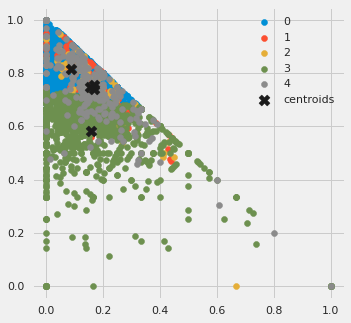

In [231]:
# Getting the Centroids and Cluster labels
centroids = km.cluster_centers_
labels = np.unique(label)

# 2D plotting
plt.figure(figsize=(5, 5)) 
for i in labels:
    plt.scatter(y_scaled[label == i , 3] , y_scaled[label == i , 4] , label = i)
plt.scatter(centroids[:,3] , centroids[:,4] , marker="X", c="k", s=120, label="centroids")
plt.legend()
plt.show()
     

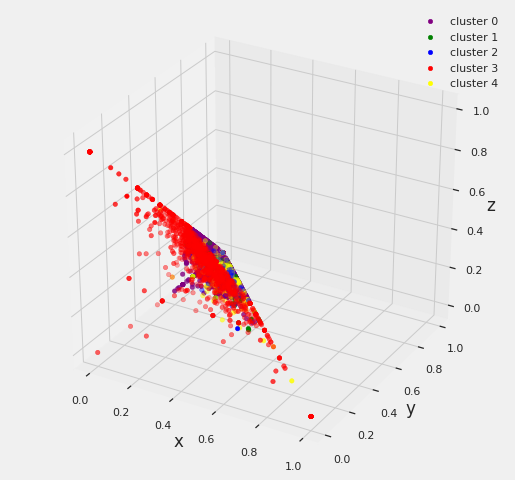

In [232]:
# 3D plotting
labels = np.unique(label)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(y_scaled[label == 0,3],y_scaled[label == 0,4],y_scaled[label == 0,2], s = 20 , color = 'purple', label = "cluster 0")  
ax.scatter(y_scaled[label == 1,3],y_scaled[label == 1,4],y_scaled[label == 1,2], s = 20 , color = 'green', label = "cluster 1")  
ax.scatter(y_scaled[label == 2,3],y_scaled[label == 2,4],y_scaled[label == 2,2], s = 20 , color = 'blue', label = "cluster 2")  
ax.scatter(y_scaled[label == 3,3],y_scaled[label == 3,4],y_scaled[label == 3,2], s = 20 , color = 'red', label = "cluster 3")  
ax.scatter(y_scaled[label == 4,3],y_scaled[label == 4,4],y_scaled[label == 4,2], s = 20 , color = 'yellow', label = "cluster 4")  

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.show()

**From the above plots, since the datapoints are closer to each other, there is no clear cluster formed.**

In [233]:
df8 = pd.DataFrame(label) # creating a dataframe for the "customer clusters"

df8.reset_index(level=0, inplace=True) # creating the "customerID" column

df8.rename(columns={'index':'CustomerID', 0:'Customer cluster'},inplace=True) # renaming the columns

df8.head()

,CustomerID,Customer cluster
0,0,0
1,1,4
2,2,4
3,3,4
4,4,4


In [234]:
# count of each clusters
df9 = df8.groupby("Customer cluster").count()
df9

,CustomerID
Customer cluster,
0,2743
1,87
2,95
3,1207
4,240


**Plotting Customer Clusters:**

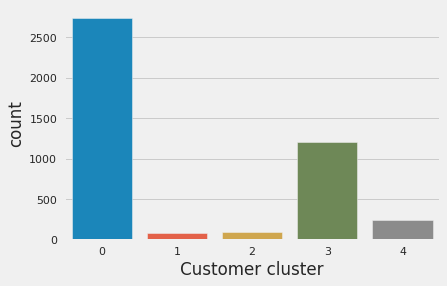

In [235]:
# check the number of clusters and number of CUSTOMERS in each cluster
import seaborn as sns
sns.countplot(df8["Customer cluster"])

**INTERPRETATION**:

* cluster-0 contains the maximum number of Customers, followed by cluster-3
* cluster-1,2 and 4 contains the least number of Customers.

**Silhouette score:**

*   If the score is 1, the cluster is dense and well-separated from other clusters.
*   A value near 0 represents overlapping clusters with samples very close to the decision boundary of the neighboring clusters.
*   Look for a silhouette score closer to 1. This score varies from -1 to 1






In [236]:
from sklearn import metrics
score = metrics.silhouette_score(y_scaled, km.labels_ )
score

0.3819000446037359

**Interpretation of Silhouette score:**
* score of 0.38 shows that the clusters are not well seprated from each other, and it overlaps each other slightly.

* overall, it is a good score




# Conclusion

Thus we have grouped *Similar Customers* based on:
* Products they bought
* Quantity and Price of the purchase
*   Country of origin of the customers

We have found that the customers can be *segmented into 5 buckets*, based on their similarity.